# Visualizing Neuronal Unit Spikes

Some of this content is adapted from the [Allen SDK Documentation](https://allensdk.readthedocs.io/en/latest/_static/examples/nb/ecephys_session.html).

After processing Neuropixel ecephys data with [Kilosort](https://github.com/MouseLand/Kilosort), individual neuronal units have been identified and are stored in the Units table, in the `Units` section of the NWB file. The Units table contains information about hypothetical neurons determined by Kilosort. With this information, and the stimulus information found in the stimulus tables of the `Intervals` section, this notebook helps examine the spiking behavior of these units in response to stimulus and their associated waveforms

### Environment Setup

In [1]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from dandi import dandiapi
from pynwb import NWBHDF5IO

%matplotlib inline

### Download Ecephys File
Change the code to download the file you're interested in. Set `dandiset_id` and `dandi_filepath` to correspond to the dandiset id and filepath of the file, respectively. If you're accessing an embargoed dataset, change `authenticate` to True, and change `dandi_api_key` to your dandi api key. If you want to stream a file instead of downloading it, checkout [Streaming an NWB File with fsspec](../basics/stream_nwb.ipynb).

In [2]:
dandiset_id = "000021"
dandi_filepath = "sub-703279277/sub-703279277_ses-719161530.nwb"
authenticate = False
# dandi_api_key = os.environ['DANDI_API_KEY']
download_loc = "."

In [3]:
filename = dandi_filepath.split("/")[-1]
filepath = f"{download_loc}/{filename}"

In [4]:
if authenticate:
    client = dandiapi.DandiAPIClient(token=dandi_api_key)
else:
    client = dandiapi.DandiAPIClient()
my_dandiset = client.get_dandiset(dandiset_id)
print(f"Got dandiset {my_dandiset}")

A newer version (0.48.0) of dandi/dandi-cli is available. You are using 0.46.3


Got dandiset DANDI:000021/draft


In [5]:
file = my_dandiset.get_asset_by_path(dandi_filepath)
# this may take awhile, especially if the file to download is large
file.download(filepath)

print(f"Downloaded file to {filepath}")

Downloaded file to ./sub-703279277_ses-719161530.nwb


### Extracting Unit Data and Stimulus Data
Below, the `Units` table is read from the file. Individual units are identified with the `id` column. Note that, while each id is unique, they are not perfectly ordinal; some ids are missing. In the cells below, the unit properties are listed and a slice of the units table is shown. More thorough descriptions of several unit properties can be found in [Visualizing Unit Quality Metrics](visualize_unit_metrics.ipynb)

Additionally, the stimulus data is also read from the NWB file's `Intervals` section. Stimulus information is stored as a series of tables depending on the type of stimulus shown in the session. One such table is displayed below.

In [6]:
io = NWBHDF5IO(filepath, mode="r", load_namespaces=True)
nwb = io.read() 

C:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.5.1 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
C:\Users\carter.peene\AppData\Local\Programs\Python\Python39\lib\site-packages\hdmf\spec\namespace.py:531: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [7]:
# this may take awhile when using file streaming
units = nwb.units.to_dataframe()
units.keys()
# units = nwb.units
# units.colnames

Index(['waveform_duration', 'cluster_id', 'peak_channel_id',
       'cumulative_drift', 'amplitude_cutoff', 'snr', 'recovery_slope',
       'isolation_distance', 'nn_miss_rate', 'silhouette_score',
       'velocity_above', 'quality', 'PT_ratio', 'l_ratio', 'velocity_below',
       'max_drift', 'isi_violations', 'firing_rate', 'amplitude',
       'local_index', 'spread', 'waveform_halfwidth', 'd_prime',
       'presence_ratio', 'repolarization_slope', 'nn_hit_rate', 'spike_times',
       'spike_amplitudes', 'waveform_mean'],
      dtype='object')

In [8]:
units

,waveform_duration,cluster_id,peak_channel_id,cumulative_drift,amplitude_cutoff,snr,recovery_slope,isolation_distance,nn_miss_rate,silhouette_score,...,local_index,spread,waveform_halfwidth,d_prime,presence_ratio,repolarization_slope,nn_hit_rate,spike_times,spike_amplitudes,waveform_mean
id,,,,,,,,,,,,,,,,,,,,,
950921187,0.604355,4,850249267,481.80,0.425574,2.209140,-0.118430,17.537571,0.009496,0.036369,...,4,50.0,0.357119,2.962274,0.99,0.381716,0.473829,"[1.0439430431793884, 1.543311060144649, 2.7287...","[0.0001908626967721937, 0.00016134635752077775...","[[0.0, 0.5961149999999966, 5.378099999999993, ..."
950921172,0.521943,3,850249267,681.53,0.390098,1.959983,-0.109729,14.677643,0.003857,0.103446,...,3,40.0,0.260972,2.067810,0.99,0.536663,0.445946,"[10.406435026164546, 17.127986534673788, 18.48...","[0.00014485615850768024, 0.0001722424107984555...","[[0.0, -1.341600000000002, -0.4586399999999933..."
950921152,0.467002,2,850249267,1070.71,0.500000,2.522905,-0.109867,15.783665,0.017776,0.027818,...,2,50.0,0.247236,2.220043,0.99,0.566559,0.284058,"[1.2775103414155262, 2.3915133536963493, 3.701...","[0.00014859435856024575, 0.0001531048673600236...","[[0.0, -0.6427199999999993, -2.836079999999998..."
950921135,0.467002,1,850249267,253.42,0.500000,2.803475,-0.150379,26.666930,0.023742,0.076530,...,1,40.0,0.233501,2.339206,0.99,0.669090,0.590737,"[9.473732504122962, 13.198542576065163, 18.302...","[0.00032386170367170055, 0.0004518112387675137...","[[0.0, -3.2800950000000078, -6.087510000000009..."
950921111,0.439531,0,850249267,141.82,0.018056,4.647943,-0.328727,66.901065,0.006595,NaN,...,0,30.0,0.219765,4.395994,0.99,1.261416,0.952667,"[1.1677100445138795, 1.1707767194728813, 1.349...","[0.00015644521007973124, 0.000214412247939483,...","[[0.0, -0.9291749999999945, -6.120270000000007..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950958827,0.686767,327,850256505,425.47,0.013262,1.197137,-0.033924,47.100934,0.000569,0.003954,...,323,70.0,0.219765,3.495039,0.99,0.166195,0.562500,"[56.68879155534432, 56.71539151930708, 140.382...","[7.006826592238747e-05, 6.896932990521833e-05,...","[[0.0, 1.456064999999999, -2.1444149999999933,..."
950958817,0.535678,326,850256505,391.97,0.029259,2.162418,-0.045889,44.871938,0.004134,-0.030602,...,322,50.0,0.164824,3.535095,0.96,0.374690,0.618474,"[32.77642395146384, 53.25072954651286, 53.3577...","[7.075155819535531e-05, 7.864810630992507e-05,...","[[0.0, 5.052254999999994, -0.3732300000000003,..."
950958015,0.576884,236,850256505,195.00,0.003844,3.398071,-0.072890,43.340940,0.001142,-0.127013,...,232,40.0,0.137353,4.977663,0.92,0.634695,0.767932,"[171.13333650757914, 614.5358357924764, 895.59...","[9.143536229559716e-05, 0.00010639289111014194...","[[0.0, 7.7005500000000175, 12.612210000000019,..."


In [9]:
stimulus_names = nwb.intervals.keys()
print(stimulus_names)

dict_keys(['drifting_gratings_presentations', 'flashes_presentations', 'gabors_presentations', 'invalid_times', 'natural_movie_one_presentations', 'natural_movie_three_presentations', 'natural_scenes_presentations', 'spontaneous_presentations', 'static_gratings_presentations'])


In [10]:
stim_table = nwb.intervals["flashes_presentations"]
stim_table[:]

,start_time,stop_time,stimulus_name,stimulus_block,color,mask,opacity,phase,size,units,stimulus_index,orientation,spatial_frequency,contrast,tags,timeseries
id,,,,,,,,,,,,,,,,
0,1290.883097,1291.133309,flashes,1.0,-1.0,None,1.0,"[0.0, 0.0]","[300.0, 300.0]",deg,1.0,0.0,"[0.0, 0.0]",0.8,[stimulus_time_interval],"[(3647, 1, timestamps pynwb.base.TimeSeries at..."
1,1292.884817,1293.135016,flashes,1.0,1.0,None,1.0,"[0.0, 0.0]","[300.0, 300.0]",deg,1.0,0.0,"[0.0, 0.0]",0.8,[stimulus_time_interval],"[(3648, 1, timestamps pynwb.base.TimeSeries at..."
2,1294.886487,1295.136691,flashes,1.0,1.0,None,1.0,"[0.0, 0.0]","[300.0, 300.0]",deg,1.0,0.0,"[0.0, 0.0]",0.8,[stimulus_time_interval],"[(3649, 1, timestamps pynwb.base.TimeSeries at..."
3,1296.888137,1297.138344,flashes,1.0,1.0,None,1.0,"[0.0, 0.0]","[300.0, 300.0]",deg,1.0,0.0,"[0.0, 0.0]",0.8,[stimulus_time_interval],"[(3650, 1, timestamps pynwb.base.TimeSeries at..."
4,1298.889787,1299.140004,flashes,1.0,-1.0,None,1.0,"[0.0, 0.0]","[300.0, 300.0]",deg,1.0,0.0,"[0.0, 0.0]",0.8,[stimulus_time_interval],"[(3651, 1, timestamps pynwb.base.TimeSeries at..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,1581.125517,1581.375726,flashes,1.0,1.0,None,1.0,"[0.0, 0.0]","[300.0, 300.0]",deg,1.0,0.0,"[0.0, 0.0]",0.8,[stimulus_time_interval],"[(3792, 1, timestamps pynwb.base.TimeSeries at..."
146,1583.127217,1583.377419,flashes,1.0,1.0,None,1.0,"[0.0, 0.0]","[300.0, 300.0]",deg,1.0,0.0,"[0.0, 0.0]",0.8,[stimulus_time_interval],"[(3793, 1, timestamps pynwb.base.TimeSeries at..."
147,1585.128807,1585.379029,flashes,1.0,-1.0,None,1.0,"[0.0, 0.0]","[300.0, 300.0]",deg,1.0,0.0,"[0.0, 0.0]",0.8,[stimulus_time_interval],"[(3794, 1, timestamps pynwb.base.TimeSeries at..."


### Getting Stimulus Epochs
Here, epochs are extracted from the stimulus tables. In this case, an 'epoch' is a continuous period of time during a session where a particular type of stimulus is shown. The output here is a list of epochs, where an epoch is a tuple of four values; the stimulus name, the stimulus block, the starting time and the ending time. Since stimulus information can vary signifcantly between experiments and NWB files, you may need to tailor the code below to extract epochs for the file you're interested in. 

In [11]:
# extract epoch times from stim table where stimulus rows have a different 'block' than following row
# returns list of epochs, where an epoch is of the form (stimulus name, stimulus block, start time, stop time)
def extract_epochs(stim_name, stim_table, epochs):
    
    # specify a current_epoch stop and start time
    epoch_start = stim_table.start_time[0]
    epoch_stop = stim_table.stop_time[0]

    # for each row, try to extend current epoch stop_time
    for i in range(len(stim_table)):
        this_block = stim_table.stimulus_block[i]
        # if end of table, end the current epoch
        if i+1 >= len(stim_table):
            epochs.append((stim_name, this_block, epoch_start, epoch_stop))
            break
            
        next_block = stim_table.stimulus_block[i+1]
        # if next row is the same stim block, push back epoch_stop time
        if next_block == this_block:
            epoch_stop = stim_table.stop_time[i+1]
        # otherwise, end the current epoch, start new epoch
        else:
            epochs.append((stim_name, this_block, epoch_start, epoch_stop))
            epoch_start = stim_table.start_time[i+1]
            epoch_stop = stim_table.stop_time[i+1]
    
    return epochs

In [12]:
# extract epochs from all valid stimulus tables
epochs = []
for stim_name in stimulus_names:
    stim_table = nwb.intervals[stim_name]
    try:
        epochs = extract_epochs(stim_name, stim_table, epochs)
    except:
        continue

# epochs take the form (stimulus name, stimulus block, start time, stop time)
print(len(epochs))
epochs.sort(key=lambda x: x[2])
for epoch in epochs:
    print(epoch)

15
('gabors_presentations', 0.0, 89.8968273815905, 1001.8917716749913)
('flashes_presentations', 1.0, 1290.8830973815907, 1589.382401312724)
('drifting_gratings_presentations', 2.0, 1591.1338573815906, 2190.634543106125)
('natural_movie_three_presentations', 3.0, 2221.6604473815905, 2822.161967381591)
('natural_movie_one_presentations', 4.0, 2852.1870373815905, 3152.4377773815904)
('drifting_gratings_presentations', 5.0, 3182.4628573815908, 3781.963503106125)
('natural_movie_three_presentations', 6.0, 4083.215117381591, 4683.716567381592)
('drifting_gratings_presentations', 7.0, 4713.741627381592, 5397.312443106124)
('static_gratings_presentations', 8.0, 5398.31325738159, 5878.714467381591)
('natural_scenes_presentations', 9.0, 5908.739537381591, 6389.157337381589)
('natural_scenes_presentations', 10.0, 6689.408117381589, 7169.809297381591)
('static_gratings_presentations', 11.0, 7199.83431738159, 7680.268867381591)
('natural_movie_one_presentations', 12.0, 7710.293937381591, 8010.5446

### Visualizing Unit Activity Throughout Epochs
Below is a view of the spiking activity of a unit throughout a session, where epochs are shown as colored sections. Set `unit_num` to be the id of the unit to view. Set `time_start` to the starting bound of the session you'd like to see, and `time_end` to the ending bound. You may want to use the output above to inform your choice. As mentioned above, if your file's stimulus information differs signifcantly, this code may need to be modified to appropriately display the epochs.

In [13]:
unit_num = 950930672 # chosen from units table
time_start = 0
time_end = 10000

In [14]:
spikes = units.spike_times[unit_num]
time_bin_edges = np.linspace(time_start, time_end, (time_end-time_start))
hist, bins = np.histogram(spikes, bins=time_bin_edges)

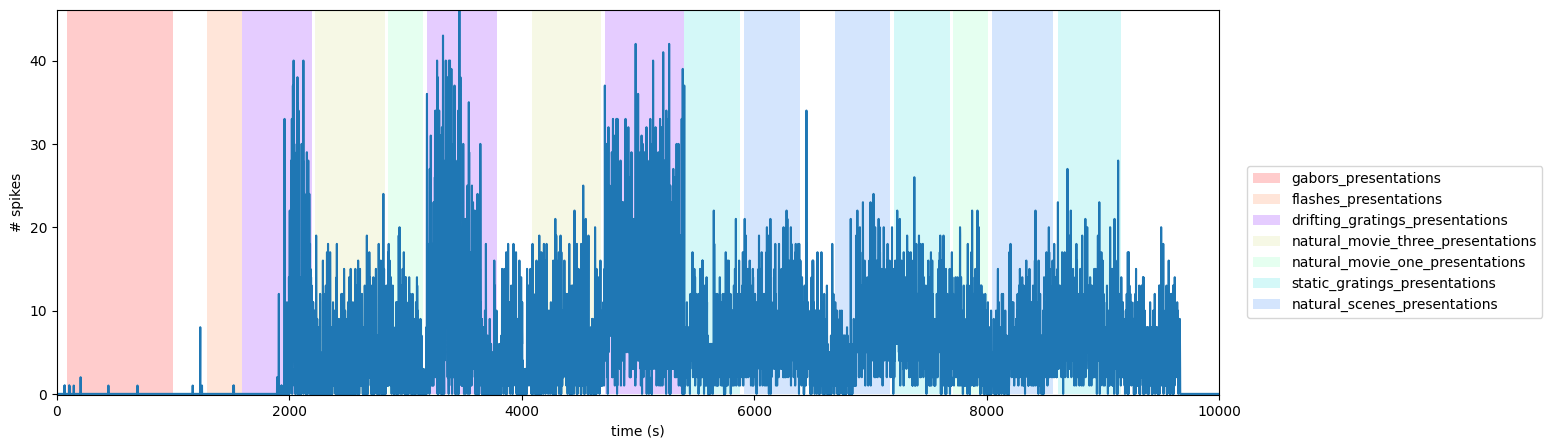

In [15]:
fig, ax = plt.subplots(figsize=(15,5))

# assign unique color to each stimulus name
stim_names = list({epoch[0] for epoch in epochs})
colors = plt.cm.rainbow(np.linspace(0,1,len(stim_names)))
stim_color_map = {stim_names[i]:colors[i] for i in range(len(stim_names))}

epoch_key = {}
height = max(hist)
# draw colored rectangles for each epoch
for epoch in epochs:
    stim_name, stim_block, start, end = epoch
    color = stim_color_map[stim_name]
    rec = ax.add_patch(mpl.patches.Rectangle((start, 0), end-start, height, alpha=0.2, facecolor=color))
    epoch_key[stim_name] = rec
    
ax.set_xlim(time_start, time_end)
ax.set_ylim(-0.1, height+0.1)
ax.set_xlabel("time (s)")
ax.set_ylabel("# spikes")

fig.legend(epoch_key.values(), epoch_key.keys(), loc="lower right", bbox_to_anchor=(1.12, 0.25))
ax.plot(bins[:-1], hist)

### Filtering Units
It might be of interest to only examine units with certain properties. They can be selected based on any metric with pandas syntax. Below, only units with a 'good' quality SNR are chosen, along with a few other choices.

In [16]:
selected_units = units[units.quality == 'good']
# selected_units = units[units.firing_rate > 5]
# selected_units = units[units.cumulative_drift < 200]
selected_units.shape

(1852, 29)

### Showing Spike Times
Here, a histogram plot of unit spikes over time is created. In the second cell below, set `stim_time` to be the time of the stimulus you're interested in viewing. To get an idea of the stimulus times you might be interested in, access one of the tables in the `Intervals` section, discussed above in **Extracting Unit Data and Stimulus Data**.  The first cell below shows how to access these. Set `interval_start` and `interval_end` to the relative time bounds, in seconds, of the histogram around `stim_time`. Finally, `start_unit` and `end_unit` can be used to choose the slice indices of `selected_units` to display. 

In [17]:
stim_time = 2000 # arbitrarily chosen here
interval_start = -0.1
interval_end = 5

start_unit = 0
end_unit = 400

In [18]:
spike_times = [elem for elem in selected_units.spike_times[start_unit:end_unit]]
if len(spike_times) == 0:
    raise Exception("There are no spiking units in this selection")
len(spike_times)

400

In [19]:
# for each unit, generate a histogram with 200 bins, where bins represent the number spikes per second
time_bin_edges = np.linspace(interval_start, interval_end, 200)
hists = []
for unit_spike_times in spike_times:
    hist, bins = np.histogram(unit_spike_times-stim_time, bins=time_bin_edges)
    hists.append(hist)
hists = np.array(hists)

hists.shape

(400, 199)

Text(0.5, 1.0, 'unit spikes over time')

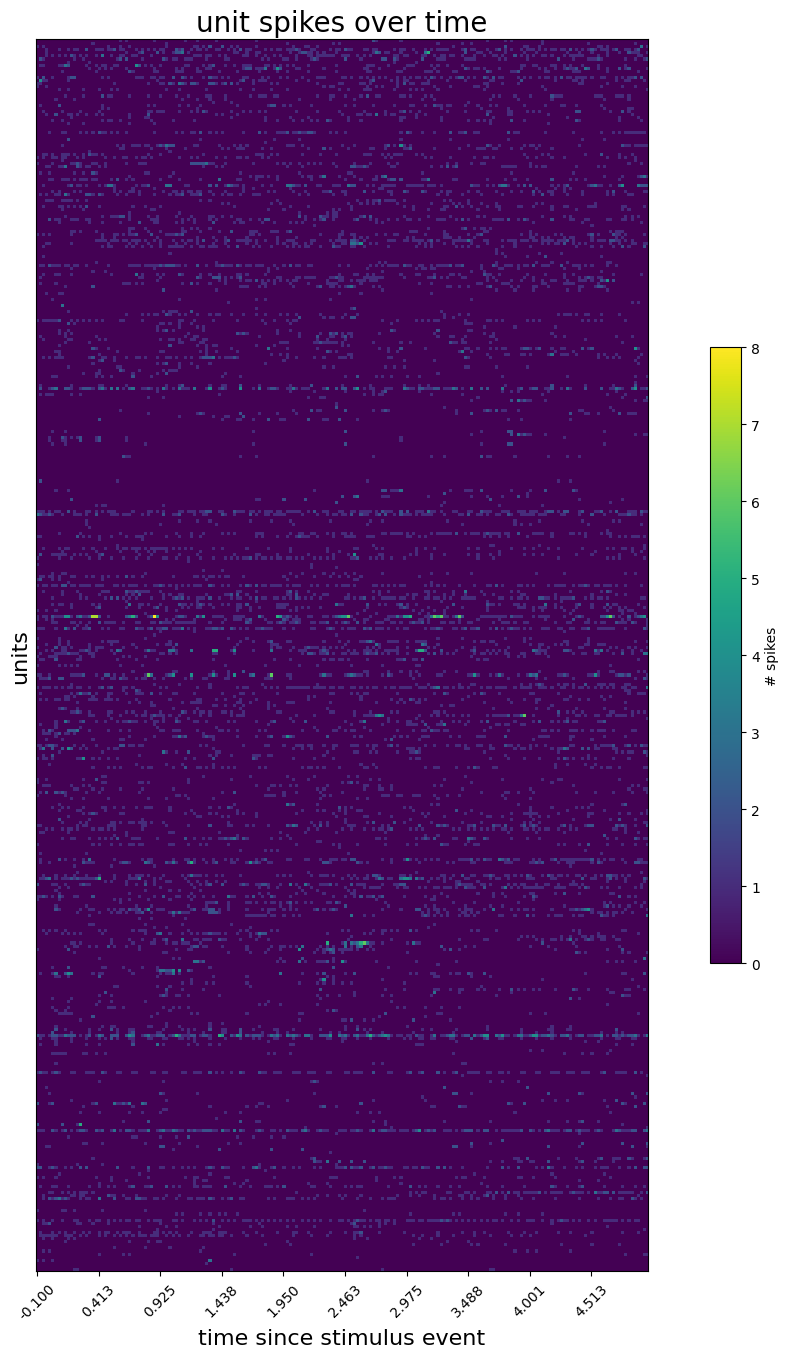

In [20]:
# display array of histograms as 2D image with color
fig, ax = plt.subplots(figsize=(16,16))
img = ax.imshow(hists)
cbar = plt.colorbar(img, shrink=0.5)
cbar.set_label('# spikes')

ax.yaxis.set_major_locator(plt.NullLocator())
ax.set_ylabel("units", fontsize=16)

xtick_step=20
reltime = np.array(time_bin_edges)
ax.set_xticks(np.arange(0, len(reltime), xtick_step))
ax.set_xticklabels([f'{mp:1.3f}' for mp in reltime[::xtick_step]], rotation=45)

ax.set_xlabel("time since stimulus event", fontsize=16)
ax.set_title("unit spikes over time", fontsize=20)

### Waveforms
The `Units` table can also be used to view the waveforms of a units with the `waveform_mean` property, which consists of the mean waveform of that unit as measured by each channel along the probe. One channel will contain the peak waveform. With a bit of legwork, the `peak_channel_id` of the unit and the `Electrodes` section can be used to get the single peak waveform as shown below. There is also a timewise and channelwise view of all the mean waveforms and an average of the waveforms across all channels. 

In [21]:
unit_num = 950921187

#### Peak waveform

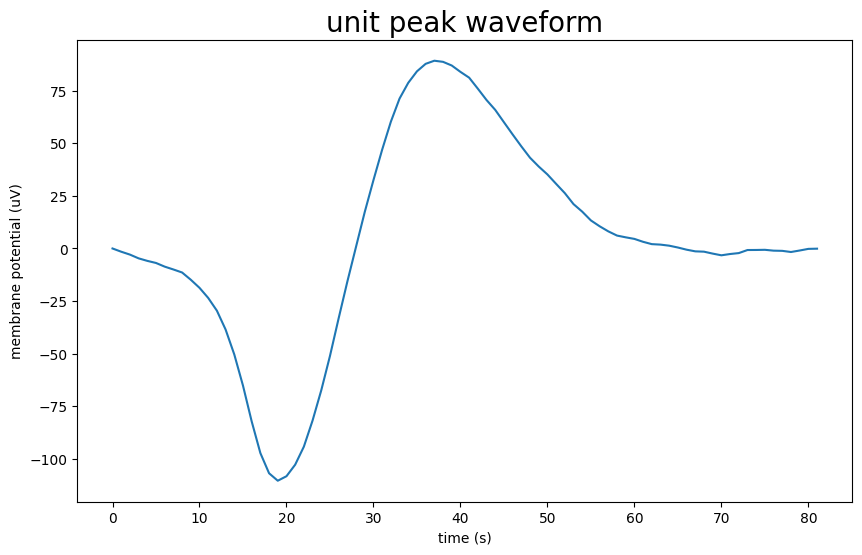

In [22]:
# use peak_channel_id to fetch the peak waveform index from electrodes table
peak_channel_id = units.peak_channel_id[unit_num]
electrodes = nwb.electrodes.to_dataframe()
local_index = electrodes.loc[peak_channel_id].local_index
peak_waveform = units.waveform_mean[unit_num][local_index]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(peak_waveform)

ax.set_xlabel("time (s)")
ax.set_ylabel("membrane potential (uV)")
ax.set_title("unit peak waveform", fontsize=20)

plt.show()

#### Time-wise waveforms

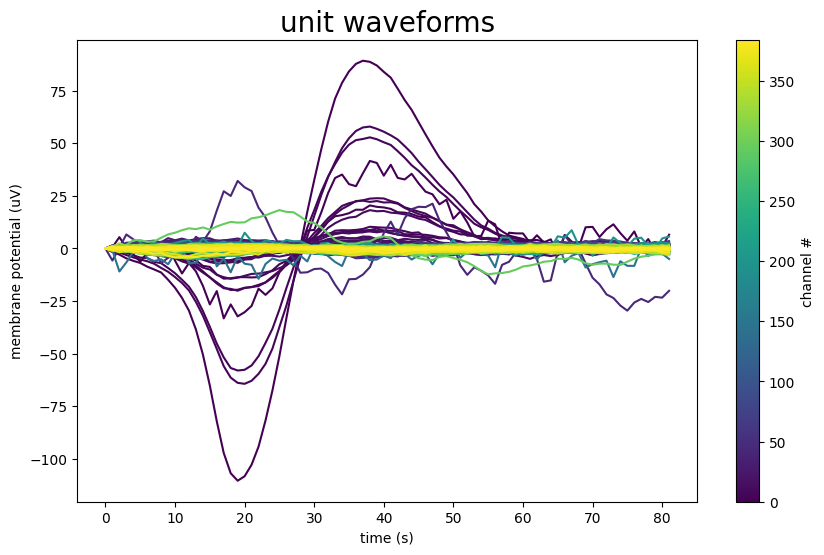

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
colors = plt.cm.viridis(np.linspace(0, 1, len(units.waveform_mean[unit_num])))
ax.set_prop_cycle(color=colors)
ax.plot(np.transpose(units.waveform_mean[unit_num]))

norm = mpl.colors.Normalize(vmin=0, vmax=len(colors))
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm), ax=ax, label='channel #')

ax.set_xlabel("time (s)")
ax.set_ylabel("membrane potential (uV)")
ax.set_title("unit waveforms", fontsize=20)

plt.show()

#### Channel-wise waveforms

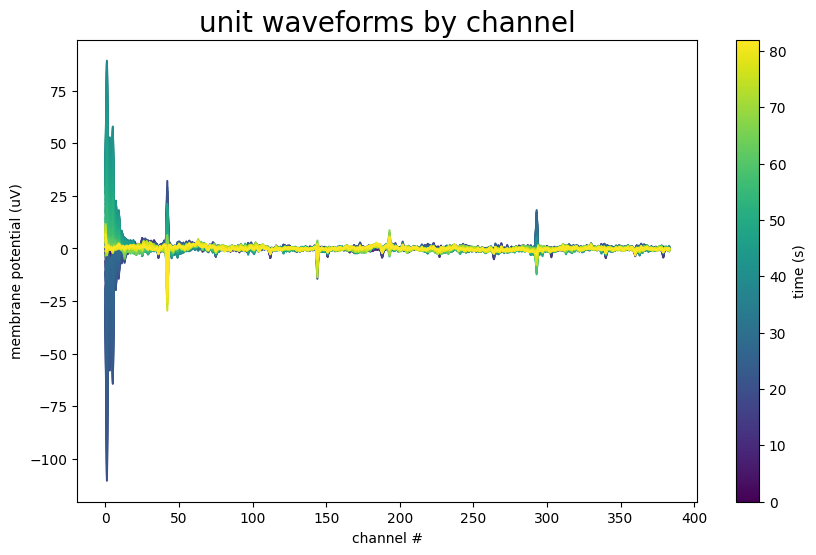

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
colors = plt.cm.viridis(np.linspace(0, 1, len(np.transpose(units.waveform_mean[unit_num])) ))
ax.set_prop_cycle(color=colors)
ax.plot(units.waveform_mean[unit_num])

norm = mpl.colors.Normalize(vmin=0, vmax=len(colors))
cb = fig.colorbar(mpl.cm.ScalarMappable(norm=norm), ax=ax, label='time (s)')

ax.set_xlabel("channel #")
ax.set_ylabel("membrane potential (uV)")
ax.set_title("unit waveforms by channel", fontsize=20)

plt.show()

#### Average waveform across channels

In [25]:
avg_waveform = np.average(units.waveform_mean[unit_num],axis=0)
avg_waveform.shape

(82,)

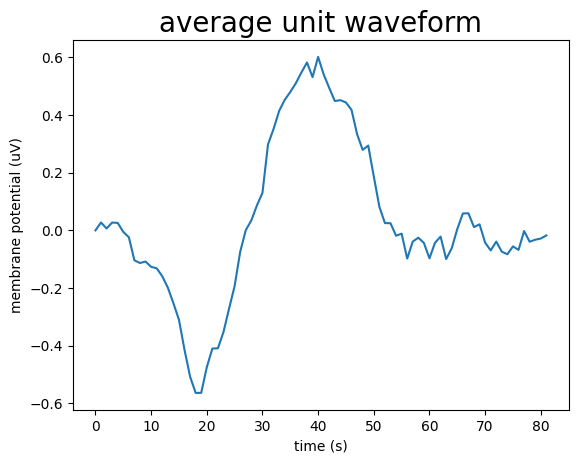

In [26]:
fig, ax = plt.subplots()
ax.plot(avg_waveform)

ax.set_xlabel("time (s)")
ax.set_ylabel("membrane potential (uV)")
ax.set_title("average unit waveform", fontsize=20)

plt.show()